<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW1problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

#Loading the MNIST data and classifying data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_dim = 784 #enter input dimesions for the image 28*28
output_dim = 10
total_classes = 10
batch_size = 128
epoch_value = 50 #number of times experiment runs
train_components = list()
test_components = list()
for i in range(60000):#Filtering based on white spaces in MNIST train data
  if Y_train[i] in [1,2,3,4,5,7]:
    train_components.append(1/3)
  elif Y_train[i] in [0,6,9]:
    train_components.append(2/3)
  elif Y_train[i] == 8:
    train_components.append(1)
    
for i in range(10000):#Filtering based on white spaces in MNIST test data
  if Y_test[i] in [1,2,3,4,5,7]:
    test_components.append(1/3)
  elif Y_test[i] in [0,6,9]:
    test_components.append(2/3)
  elif Y_test[i] == 8:
    test_components.append(1)

#we are calculating the height and width of training and test images
train_row = np.sum(X_train, axis = 1, keepdims = True)
test_row = np.sum(X_test, axis = 1 , keepdims = True)
train_column = np.sum(X_train, axis = 2, keepdims = True)
test_column = np.sum(X_test, axis = 2, keepdims = True)
train_width = list()
train_height = list()
test_height = list()
test_width = list()
for i in range(60000):
  count1,count2 = 0,0
  for j in range(28):
    if train_row[i][0][j] > 0:count1 += 1
    if train_column[i][j][0] > 0:count2 += 1
  train_width.append(count1/28)
  train_height.append(count2/28)
test_width = list()
for i in range(10000):
  count = 0
  for j in range(28):
    if test_row[i][0][j] > 0:count1 += 1
    if test_column[i][j][0] > 0:count2 += 1
  test_width.append(count1/28)
  test_height.append(count2/28)


# We are adding additional feature where we count number of white spaces in training and test data and add them to the model
train_white = list()
for i in range(60000):
  a = 0
  for j in range(28):
    for k in range(28):
      if X_train[i][j][k] == 0:
        a += 1
  train_white.append(1-(a/input_dim))
  
test_white = list()
for i in range(10000):
  a = 0
  for j in range(28):
    for k in range(28):
      if X_test[i][j][k] == 0:
        a += 1
  test_white.append(1-(a/input_dim))
  
#Reshape X_test and X_train values
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Now we divide all values with 255 to make sure that all values are with in 0 and 1
X_train /= 255
X_test /= 255
#concatenating the additional features to our model
x_train = np.zeros((X_train.shape[0],X_train.shape[1]+4))
x_test = np.zeros((X_test.shape[0],X_test.shape[1]+4))

#Adding training set features
for i in range(X_train.shape[0]):
  for j in range(input_dim):
    x_train[i][j] = X_train[i][j]
  x_train[i][X_train.shape[1]] = train_components[i]
  x_train[i][X_train.shape[1]+1] = train_width[i]
  x_train[i][X_train.shape[1]+2] = train_height[i]
  x_train[i][X_train.shape[1]+3] = train_white[i]
#Adding test set features
for i in range(X_test.shape[0]):
  for j in range(input_dim):
    x_test[i][j] = X_test[i][j]
  x_test[i][X_test.shape[1]] = test_components[i]
  x_test[i][X_test.shape[1]+1] = test_width[i]
  x_test[i][X_test.shape[1]+2] = test_height[i]
  x_test[i][X_test.shape[1]+3] = test_white[i]
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)
model = Sequential() 
#Now we add the softmax as activation function and compile the model
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.SGD(lr=0.05), loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])#calling sgd, categorical cross entropy functions and accuracy from keras
history = model.fit(x_train, Y_train, batch_size = batch_size, nb_epoch = epoch_value)#Training the test set and train set using keras
print(history.history)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.7110 - acc: 0.8302
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4118 - acc: 0.8941
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3594 - acc: 0.9044
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3311 - acc: 0.9109
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.3121 - acc: 0.9158
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2980 - acc: 0.9197
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2868 - acc: 0.9229
Epoch 8/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2775 - acc: 0.9256
Epoch 9/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2696 - acc: 0.9276
Epoch 10/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2627 - acc: 0.9296

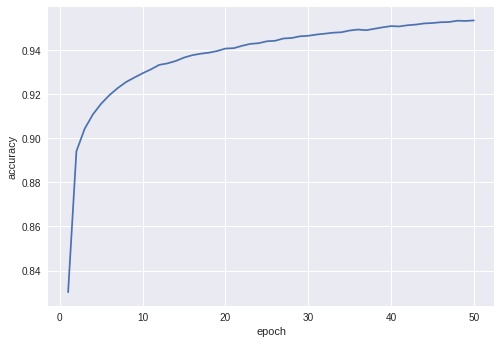

In [24]:
#plotting in the graph
plotaccuracy = plt.plot(range(1,51),history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show(plotaccuracy)
